In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('../Datasets/predictive_analytics_data.xlsx')
print(data.head())

  foreignworker               status  \
0           yes             < 0 Euro   
1           yes           < 200 Euro   
2           yes  no checking account   
3           yes             < 0 Euro   
4           yes             < 0 Euro   

                              credithistory              purpose  \
0                         critical account/     radio/television   
1  existing credits paid back duly till now     radio/television   
2                         critical account/            education   
3  existing credits paid back duly till now  furniture/equipment   
4           delay in paying off in the past            car (new)   

                       savings     employmentsince otherdebtors  \
0  unknown/ no savings account       .. >= 7 years         none   
1               ... < 100 Euro  1 <= ... < 4 years         none   
2               ... < 100 Euro  4 <= ... < 7 years         none   
3               ... < 100 Euro  4 <= ... < 7 years    guarantor   
4              

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   foreignworker             988 non-null    object 
 1   status                    988 non-null    object 
 2   credithistory             988 non-null    object 
 3   purpose                   988 non-null    object 
 4   savings                   988 non-null    object 
 5   employmentsince           988 non-null    object 
 6   otherdebtors              988 non-null    object 
 7   property                  988 non-null    object 
 8   otherinstallments         988 non-null    object 
 9   housing                   988 non-null    object 
 10  job                       988 non-null    object 
 11  phone                     988 non-null    object 
 12  duration                  988 non-null    int64  
 13  creditamount              988 non-null    int64  
 14  installmen

In [5]:
data['foreignworker'].unique()

array(['yes', 'no', 'Unknown'], dtype=object)

In [6]:
data['creditworthy'].unique()

array(['Worthy', 'Not Worthy'], dtype=object)

In [7]:
Xtab = pd.crosstab(data['gender'], data['creditworthy'])
print(Xtab)

creditworthy  Not Worthy  Worthy
gender                          
female               107     198
male                 190     493


In [9]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval)

0.026073325142675467


In [10]:
data['age']

0      67
1      22
2      49
3      45
4      53
       ..
983    31
984    40
985    38
986    23
987    27
Name: age, Length: 988, dtype: int64

In [11]:
from scipy.stats import ttest_ind

In [12]:
worthy_age = data[data['creditworthy'] == 'Worthy']['age']
unworthy_age = data[data['creditworthy'] == 'Not Worthy']['age']

In [13]:
worthy_age

0      67
2      49
3      45
5      35
6      53
       ..
982    50
983    31
984    40
985    38
987    27
Name: age, Length: 691, dtype: int64

In [14]:
unworthy_age

1      22
4      53
9      28
10     24
12     60
       ..
967    25
968    49
969    33
971    26
986    23
Name: age, Length: 297, dtype: int64

In [15]:
np.mean(worthy_age)

36.159189580318376

In [16]:
np.mean(unworthy_age)

33.83838383838384

In [18]:
tstat, pval = ttest_ind(worthy_age, unworthy_age)
print(pval)

0.0030366686079082426


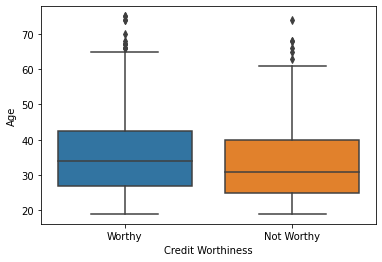

In [20]:
sns.boxplot(data = data, x = 'creditworthy', y = 'age')
plt.xlabel('Credit Worthiness')
plt.ylabel('Age')
plt.show()

In [22]:
data['status'].unique()

array(['< 0 Euro', '< 200 Euro', 'no checking account', '>= 200 Euro'],
      dtype=object)

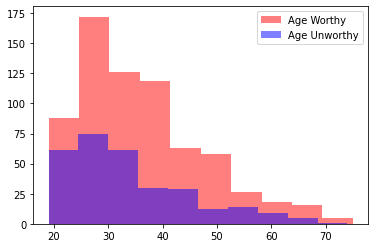

In [23]:
plt.hist(worthy_age, color = 'red', label = 'Age Worthy', alpha = 0.5)
plt.hist(unworthy_age, color = 'blue', label = 'Age Unworthy', alpha = 0.5)
plt.legend()
plt.show()

In [24]:
data['job'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employ',
       'unemployed/ unskilled - non-resident'], dtype=object)